In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sqlite3
from glob import glob

%matplotlib inline

In [2]:
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData/imdb.title.crew.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.title.ratings.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz',
 './zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.title.principals.csv.gz']

In [3]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv.gz", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

In [4]:
csv_files_dict.keys()

dict_keys(['imdb_title_crew', 'tmdb_movies', 'imdb_title_akas', 'imdb_title_ratings', 'imdb_name_basics', 'imdb_title_basics', 'tn_movie_budgets', 'bom_movie_gross', 'imdb_title_principals'])

In [5]:
movie_budgets_df = csv_files_dict['tn_movie_budgets']
movie_budgets_df.head(50)

release_date                                             movie  \
id                                                                   
1   Dec 18, 2009                                            Avatar   
2   May 20, 2011       Pirates of the Caribbean: On Stranger Tides   
3    Jun 7, 2019                                      Dark Phoenix   
4    May 1, 2015                           Avengers: Age of Ultron   
5   Dec 15, 2017                 Star Wars Ep. VIII: The Last Jedi   
6   Dec 18, 2015              Star Wars Ep. VII: The Force Awakens   
7   Apr 27, 2018                            Avengers: Infinity War   
8   May 24, 2007        Pirates of the Caribbean: At Worldâs End   
9   Nov 17, 2017                                    Justice League   
10   Nov 6, 2015                                           Spectre   
11  Jul 20, 2012                             The Dark Knight Rises   
12  May 25, 2018                           Solo: A Star Wars Story   
13   Jul 2, 2013                                   The Lone Ranger   
14   Mar 9, 2012                                       John Carter   
15  Nov 24, 2010                                           Tangled   
16   May 4, 2007                                      Spider-Man 3   
17   May 6, 2016                        Captain America: Civil War   
18  Mar 25, 2016                Batman v Superman: Dawn of Justice   
19  Dec 14, 2012                 The Hobbit: An Unexpected Journey   
20  Jul 15, 2009            Harry Potter and the Half-Blood Prince   
21  Dec 13, 2013               The Hobbit: The Desolation of Smaug   
22  Dec 17, 2014         The Hobbit: The Battle of the Five Armies   
23  Apr 14, 2017                           The Fate of the Furious   
24  Jun 28, 2006                                  Superman Returns   
25  May 26, 2017  Pirates of the Caribbean: Dead Men Tell No Tales   
26  Nov 14, 2008                                 Quantum of Solace   
27   May 4, 2012                                      The Avengers   
28   Jul 7, 2006      Pirates of the Caribbean: Dead Manâs Chest   
29  Jun 14, 2013                                      Man of Steel   
30  May 16, 2008          The Chronicles of Narnia: Prince Caspian   
31   Jul 3, 2012                            The Amazing Spider-Man   
32  May 18, 2012                                        Battleship   
33  Jun 21, 2017                     Transformers: The Last Knight   
34  Jun 12, 2015                                    Jurassic World   
35  May 25, 2012                                    Men in Black 3   
36  Jun 24, 2009               Transformers: Revenge of the Fallen   
37  Jun 27, 2014                   Transformers: Age of Extinction   
38  May 26, 2006                             X-Men: The Last Stand   
39  May 14, 2010                                        Robin Hood   
40  Dec 14, 2005                                         King Kong   
41   Dec 7, 2007                                The Golden Compass   
42  Feb 16, 2018                                     Black Panther   
43  Dec 19, 1997                                           Titanic   
44  Jun 15, 2018                                     Incredibles 2   
45  Dec 16, 2016                      Rogue One: A Star Wars Story   
46  Jun 17, 2016                                      Finding Dory   
47  Jun 18, 2010                                       Toy Story 3   
48   May 3, 2013                                        Iron Man 3   
49   May 5, 2017                     Guardians of the Galaxy Vol 2   
50  Jun 30, 2004                                      Spider-Man 2   

   production_budget domestic_gross worldwide_gross  
id                                                   
1       $425,000,000   $760,507,625  $2,776,345,279  
2       $410,600,000   $241,063,875  $1,045,663,875  
3       $350,000,000    $42,762,350    $149,762,350  
4       $330,600,000   $459,005,868  $1,403,013,963  
5       $317,000,000   $620,181,382  $1

### **I must adjust values for inflation**

In [6]:
movie_budgets_df.describe()

release_date      movie production_budget domestic_gross  \
count           5782       5782              5782           5782   
unique          2418       5698               509           5164   
top     Dec 31, 2014  Halloween       $20,000,000             $0   
freq              24          3               231            548   

       worldwide_gross  
count             5782  
unique            5356  
top                 $0  
freq               367

In [7]:
movie_budgets_df.shape

(5782, 5)

In [8]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [9]:
def convert_amt_to_int(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('int')
    return df

In [10]:
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in money_cols:
    movie_budgets_df = convert_amt_to_int(movie_budgets_df, col)

In [11]:
movie_budgets_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [12]:
for col in movie_budgets_df:
    print(col)
    print(movie_budgets_df[col].value_counts(normalize=True)[:])
    print('===================================')

release_date
Dec 31, 2014    0.004151
Dec 31, 2015    0.003978
Dec 31, 2010    0.002594
Dec 31, 2008    0.002421
Dec 31, 2013    0.002248
                  ...   
Jul 17, 1998    0.000173
Apr 15, 2015    0.000173
Dec 4, 1981     0.000173
Mar 15, 1985    0.000173
Jul 12, 2019    0.000173
Name: release_date, Length: 2418, dtype: float64
movie
Halloween                 0.000519
Home                      0.000519
King Kong                 0.000519
Hellboy                   0.000346
Casino Royale             0.000346
                            ...   
Walking with Dinosaurs    0.000173
Jumper                    0.000173
Blow                      0.000173
Trade                     0.000173
Stonewall                 0.000173
Name: movie, Length: 5698, dtype: float64
production_budget
20000000    0.039952
10000000    0.036666
30000000    0.030612
15000000    0.029920
25000000    0.029575
              ...   
16400000    0.000173
103000      0.000173
6537890     0.000173
780000      0.000173
28

In [13]:
movie_budgets_df['budget_gross_diff'] = movie_budgets_df['worldwide_gross'] - \
                                        movie_budgets_df['production_budget']
movie_budgets_df.head()

release_date                                        movie  \
id                                                              
1   Dec 18, 2009                                       Avatar   
2   May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
3    Jun 7, 2019                                 Dark Phoenix   
4    May 1, 2015                      Avengers: Age of Ultron   
5   Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

    production_budget  domestic_gross  worldwide_gross  budget_gross_diff  
id                                                                         
1           425000000       760507625       2776345279         2351345279  
2           410600000       241063875       1045663875          635063875  
3           350000000        42762350        149762350         -200237650  
4           330600000       459005868       1403013963         1072413963  
5           317000000       620181382       1316721747          999721747

In [14]:
movie_budgets_df.shape

(5782, 6)

In [72]:
movie_budgets_df = movie_budgets_df.sort_values(by = 'adjusted_budget_gross_diff', ascending=False)

In [74]:
movie_budgets_df.head(10)

release_date                            movie  year  \
id                                                       
68   1939-12-15               Gone with the Wind  1939   
18   1937-12-21  Snow White and the Seven Dwarfs  1937   
47   1942-08-13                            Bambi  1942   
65   1977-05-25     Star Wars Ep. IV: A New Hope  1977   
43   1997-12-19                          Titanic  1997   
76   1950-02-15                       Cinderella  1950   
1    2009-12-18                           Avatar  2009   
60   1965-03-02               The Sound of Music  1965   
42   1973-12-26                     The Exorcist  1973   
41   1975-06-20                             Jaws  1975   

    adjusted_production_budget  adjusted_domestic_gross  \
id                                                        
68                7.378716e+07             3.758992e+09   
18                2.737062e+07             3.401563e+09   
47                1.377360e+07             1.650216e+09   
65                4.831919e+07             2.025004e+09   
43                3.284278e+08             1.082767e+09   
76                3.268695e+07             9.580657e+08   
1                 5.212931e+08             9.328174e+08   
60                6.939270e+07             1.381205e+09   
42                6.879922e+07             1.320643e+09   
41                5.930082e+07             1.284851e+09   

    adjusted_worldwide_gross  adjusted_budget_gross_diff  adjusted_roi  
id                                                                      
68              7.388653e+09                1.107386e+10    150.078375  
18              3.401563e+09                6.775755e+09    247.555761  
47              4.302245e+09                5.938687e+09    431.164336  
65              3.455252e+09                5.431938e+09    112.417819  
43              3.626185e+09                4.380524e+09     13.337862  
76              2.971034e+09                3.896413e+09    119.203936  
1               3.405387e+09                3.816912e+09      7.322007  
60              2.422095e+09                3.733907e+09     53.808362  
42              2.455069e+09                3.706912e+09     53.880152  
41              2.326075e+09                3.551625e+09     59.891667

In [75]:
movie_budgets_df_top50 = movie_budgets_df[:50]

<AxesSubplot:xlabel='adjusted_budget_gross_diff', ylabel='movie'>

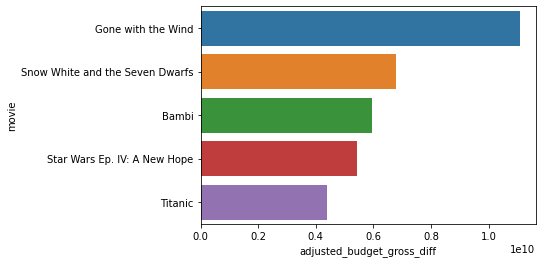

In [76]:
sns.barplot(x ='adjusted_budget_gross_diff', y ='movie', data = movie_budgets_df_top50[:5])

## Exploring ROI

In [21]:
movie_budgets_df['ROI'] = movie_budgets_df['budget_gross_diff'] / movie_budgets_df['production_budget']
movie_budgets_df.head()

release_date                                 movie  production_budget  \
id                                                                          
6   Dec 18, 2015  Star Wars Ep. VII: The Force Awakens          306000000   
1   Dec 18, 2009                                Avatar          425000000   
42  Feb 16, 2018                         Black Panther          200000000   
7   Apr 27, 2018                Avengers: Infinity War          300000000   
43  Dec 19, 1997                               Titanic          200000000   

    domestic_gross  worldwide_gross  budget_gross_diff        ROI  
id                                                                 
6        936662225       2053311220         1747311220   5.710167  
1        760507625       2776345279         2351345279   5.532577  
42       700059566       1348258224         1148258224   5.741291  
7        678815482       2048134200         1748134200   5.827114  
43       659363944       2208208395         2008208395  10.041042

In [22]:
movie_budgets_df = movie_budgets_df.sort_values(by = 'ROI',ascending=False)

In [23]:
! pip install cpi

In [24]:
import cpi
cpi.inflate(100,1950)

1073.9045643153527

In [25]:
cpi.update()

In [26]:
cpi.inflate(50,1913)

1307.1262626262626

In [27]:
cpi.inflate(100,1950)

1073.9045643153527

In [28]:
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])
movie_budgets_df.head()

release_date                    movie  production_budget  domestic_gross  \
id                                                                            
46   1972-06-30              Deep Throat              25000        45000000   
14   1980-03-21                  Mad Max             200000         8750000   
93   2009-09-25      Paranormal Activity             450000       107918810   
80   2015-07-10              The Gallows             100000        22764410   
7    1999-07-14  The Blair Witch Project             600000       140539099   

    worldwide_gross  budget_gross_diff          ROI  
id                                                   
46         45000000           44975000  1799.000000  
14         99750000           99550000   497.750000  
93        194183034          193733034   430.517853  
80         41656474           41556474   415.564740  
7         248300000          247700000   412.833333

In [29]:
movie_budgets_df['year'] = movie_budgets_df['release_date'].dt.year

In [30]:
movie_budgets_df['year'].isna().sum()

0

In [31]:
movie_budgets_df['production_budget'].isna().sum()

0

In [32]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 46 to 18
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   int64         
 3   domestic_gross     5782 non-null   int64         
 4   worldwide_gross    5782 non-null   int64         
 5   budget_gross_diff  5782 non-null   int64         
 6   ROI                5782 non-null   float64       
 7   year               5782 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 406.5+ KB


In [33]:
cpi.update()

In [46]:
movie_budgets_df['adjusted'] = movie_budgets_df.apply(lambda x: cpi.inflate(x.production_budget, x.release_date),\
                                                      axis=1)
movie_budgets_df.head()

<ipython-input-46-c1d708be93b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_budgets_df['adjusted'] = movie_budgets_df.apply(lambda x: cpi.inflate(x.production_budget, x.release_date),\


release_date                            movie  production_budget  \
id                                                                    
32   2014-12-26                         Barbecue           10000000   
71   2008-08-14  The Rise and Fall of Miss Thang              10000   
19   2005-10-13                   The Dark Hours             400000   
70   1996-04-01                             Bang              10000   
67   2018-05-11                     Higher Power             500000   

    domestic_gross  worldwide_gross  budget_gross_diff       ROI  year  \
id                                                                       
32             388           247565           -9752435 -0.975244  2014   
71             401              401              -9599 -0.959900  2008   
19             423              423            -399577 -0.998942  2005   
70             527              527              -9473 -0.947300  1996   
67             528              528            -499472 -0.998944  2018   

        adjusted  adjusted_production_budget  
id                                            
32  1.128039e+07                1.128039e+07  
71  1.209009e+04                1.209009e+04  
19  5.318815e+05                5.318815e+05  
70  1.694671e+04                1.694671e+04  
67  5.264102e+05                5.264102e+05

In [35]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [36]:
from pandas_profiling import ProfileReport

In [37]:
profile = ProfileReport(movie_budgets_df, title ='PPR', html={'style':{'full_width':True}})

In [38]:
profile

In [41]:
movie_budgets_df.head()

release_date                      movie  production_budget  domestic_gross  \
id                                                                              
18   2014-06-24                A Fine Step            1000000               0   
31   2012-12-31                     Trance             950000               0   
55   2013-06-25  Hansel & Gretel Get Baked            4500000               0   
58   2015-11-03            The Final Girls            4500000               0   
59   2017-12-01              Daisy Winters            4500000               0   

    worldwide_gross  budget_gross_diff  ROI  year      adjusted  
id                                                               
18                0           -1000000 -1.0  2014  1.111327e+06  
31                0            -950000 -1.0  2012  1.095958e+06  
55                0           -4500000 -1.0  2013  5.104608e+06  
58                0           -4500000 -1.0  2015  5.022190e+06  
59                0           -4500000 -1.0  2017  4.835012e+06

In [40]:
movie_budgets_df = movie_budgets_df.sort_values(by = 'domestic_gross', ascending=True)
movie_budgets_df.head()

release_date                      movie  production_budget  domestic_gross  \
id                                                                              
18   2014-06-24                A Fine Step            1000000               0   
31   2012-12-31                     Trance             950000               0   
55   2013-06-25  Hansel & Gretel Get Baked            4500000               0   
58   2015-11-03            The Final Girls            4500000               0   
59   2017-12-01              Daisy Winters            4500000               0   

    worldwide_gross  budget_gross_diff  ROI  year      adjusted  
id                                                               
18                0           -1000000 -1.0  2014  1.111327e+06  
31                0            -950000 -1.0  2012  1.095958e+06  
55                0           -4500000 -1.0  2013  5.104608e+06  
58                0           -4500000 -1.0  2015  5.022190e+06  
59                0           -4500000 -1.0  2017  4.835012e+06

In [43]:
movie_budgets_df = movie_budgets_df[movie_budgets_df.domestic_gross != 0]

In [47]:
movie_budgets_df.head()

release_date                            movie  production_budget  \
id                                                                    
32   2014-12-26                         Barbecue           10000000   
71   2008-08-14  The Rise and Fall of Miss Thang              10000   
19   2005-10-13                   The Dark Hours             400000   
70   1996-04-01                             Bang              10000   
67   2018-05-11                     Higher Power             500000   

    domestic_gross  worldwide_gross  budget_gross_diff       ROI  year  \
id                                                                       
32             388           247565           -9752435 -0.975244  2014   
71             401              401              -9599 -0.959900  2008   
19             423              423            -399577 -0.998942  2005   
70             527              527              -9473 -0.947300  1996   
67             528              528            -499472 -0.998944  2018   

        adjusted  adjusted_production_budget  
id                                            
32  1.128039e+07                1.128039e+07  
71  1.209009e+04                1.209009e+04  
19  5.318815e+05                5.318815e+05  
70  1.694671e+04                1.694671e+04  
67  5.264102e+05                5.264102e+05

In [48]:
movie_budgets_df['adjusted_domestic_gross'] = movie_budgets_df.apply(lambda x: cpi.inflate(x.domestic_gross, x.release_date),\
                                                      axis=1)
movie_budgets_df.head()

<ipython-input-48-1c2a000abeb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_budgets_df['adjusted_domestic_gross'] = movie_budgets_df.apply(lambda x: cpi.inflate(x.domestic_gross, x.release_date),\


release_date                            movie  production_budget  \
id                                                                    
32   2014-12-26                         Barbecue           10000000   
71   2008-08-14  The Rise and Fall of Miss Thang              10000   
19   2005-10-13                   The Dark Hours             400000   
70   1996-04-01                             Bang              10000   
67   2018-05-11                     Higher Power             500000   

    domestic_gross  worldwide_gross  budget_gross_diff       ROI  year  \
id                                                                       
32             388           247565           -9752435 -0.975244  2014   
71             401              401              -9599 -0.959900  2008   
19             423              423            -399577 -0.998942  2005   
70             527              527              -9473 -0.947300  1996   
67             528              528            -499472 -0.998944  2018   

        adjusted  adjusted_production_budget  adjusted_domestic_gross  
id                                                                     
32  1.128039e+07                1.128039e+07               437.678977  
71  1.209009e+04                1.209009e+04               484.812708  
19  5.318815e+05                5.318815e+05               562.464714  
70  1.694671e+04                1.694671e+04               893.091356  
67  5.264102e+05                5.264102e+05               555.889216

In [49]:
movie_budgets_df['adjusted_worldwide_gross'] = movie_budgets_df.apply(lambda x: cpi.inflate(x.worldwide_gross, x.release_date),\
                                                      axis=1)
movie_budgets_df.head()

<ipython-input-49-c26eff10bd0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_budgets_df['adjusted_worldwide_gross'] = movie_budgets_df.apply(lambda x: cpi.inflate(x.worldwide_gross, x.release_date),\


release_date                            movie  production_budget  \
id                                                                    
32   2014-12-26                         Barbecue           10000000   
71   2008-08-14  The Rise and Fall of Miss Thang              10000   
19   2005-10-13                   The Dark Hours             400000   
70   1996-04-01                             Bang              10000   
67   2018-05-11                     Higher Power             500000   

    domestic_gross  worldwide_gross  budget_gross_diff       ROI  year  \
id                                                                       
32             388           247565           -9752435 -0.975244  2014   
71             401              401              -9599 -0.959900  2008   
19             423              423            -399577 -0.998942  2005   
70             527              527              -9473 -0.947300  1996   
67             528              528            -499472 -0.998944  2018   

        adjusted  adjusted_production_budget  adjusted_domestic_gross  \
id                                                                      
32  1.128039e+07                1.128039e+07               437.678977   
71  1.209009e+04                1.209009e+04               484.812708   
19  5.318815e+05                5.318815e+05               562.464714   
70  1.694671e+04                1.694671e+04               893.091356   
67  5.264102e+05                5.264102e+05               555.889216   

    adjusted_worldwide_gross  
id                            
32             279262.876280  
71                484.812708  
19                562.464714  
70                893.091356  
67                555.889216

In [53]:
movie_budgets_df['adjusted_budget_gross_diff'] = (movie_budgets_df['adjusted_worldwide_gross'] + movie_budgets_df['adjusted_domestic_gross']) - \
                                        movie_budgets_df['adjusted_production_budget']
movie_budgets_df.head()

<ipython-input-53-1d9bd36a09d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_budgets_df['adjusted_budget_gross_diff'] = (movie_budgets_df['adjusted_worldwide_gross'] + movie_budgets_df['adjusted_domestic_gross']) - \


release_date                            movie  production_budget  \
id                                                                    
32   2014-12-26                         Barbecue           10000000   
71   2008-08-14  The Rise and Fall of Miss Thang              10000   
19   2005-10-13                   The Dark Hours             400000   
70   1996-04-01                             Bang              10000   
67   2018-05-11                     Higher Power             500000   

    domestic_gross  worldwide_gross  budget_gross_diff       ROI  year  \
id                                                                       
32             388           247565           -9752435 -0.975244  2014   
71             401              401              -9599 -0.959900  2008   
19             423              423            -399577 -0.998942  2005   
70             527              527              -9473 -0.947300  1996   
67             528              528            -499472 -0.998944  2018   

        adjusted  adjusted_production_budget  adjusted_domestic_gross  \
id                                                                      
32  1.128039e+07                1.128039e+07               437.678977   
71  1.209009e+04                1.209009e+04               484.812708   
19  5.318815e+05                5.318815e+05               562.464714   
70  1.694671e+04                1.694671e+04               893.091356   
67  5.264102e+05                5.264102e+05               555.889216   

    adjusted_worldwide_gross  adjusted_budget_gross_diff  
id                                                        
32             279262.876280               -1.100069e+07  
71                484.812708               -1.112047e+04  
19                562.464714               -5.307566e+05  
70                893.091356               -1.516052e+04  
67                555.889216               -5.252985e+05

In [54]:
movie_budgets_df['adjusted_roi'] = movie_budgets_df['adjusted_budget_gross_diff'] / movie_budgets_df['adjusted_production_budget']
movie_budgets_df.head()

<ipython-input-54-0317435397d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_budgets_df['adjusted_roi'] = movie_budgets_df['adjusted_budget_gross_diff'] / movie_budgets_df['adjusted_production_budget']


release_date                            movie  production_budget  \
id                                                                    
32   2014-12-26                         Barbecue           10000000   
71   2008-08-14  The Rise and Fall of Miss Thang              10000   
19   2005-10-13                   The Dark Hours             400000   
70   1996-04-01                             Bang              10000   
67   2018-05-11                     Higher Power             500000   

    domestic_gross  worldwide_gross  budget_gross_diff       ROI  year  \
id                                                                       
32             388           247565           -9752435 -0.975244  2014   
71             401              401              -9599 -0.959900  2008   
19             423              423            -399577 -0.998942  2005   
70             527              527              -9473 -0.947300  1996   
67             528              528            -499472 -0.998944  2018   

        adjusted  adjusted_production_budget  adjusted_domestic_gross  \
id                                                                      
32  1.128039e+07                1.128039e+07               437.678977   
71  1.209009e+04                1.209009e+04               484.812708   
19  5.318815e+05                5.318815e+05               562.464714   
70  1.694671e+04                1.694671e+04               893.091356   
67  5.264102e+05                5.264102e+05               555.889216   

    adjusted_worldwide_gross  adjusted_budget_gross_diff  adjusted_roi  
id                                                                      
32             279262.876280               -1.100069e+07     -0.975205  
71                484.812708               -1.112047e+04     -0.919800  
19                562.464714               -5.307566e+05     -0.997885  
70                893.091356               -1.516052e+04     -0.894600  
67                555.889216               -5.252985e+05     -0.997888

In [58]:
movie_budgets_df.drop(columns=['production_budget','domestic_gross','worldwide_gross','budget_gross_diff','ROI'], inplace=True)

KeyError: "['production_budget' 'domestic_gross' 'worldwide_gross'\n 'budget_gross_diff' 'ROI'] not found in axis"

In [59]:
movie_budgets_df.head()

release_date                            movie  year      adjusted  \
id                                                                     
32   2014-12-26                         Barbecue  2014  1.128039e+07   
71   2008-08-14  The Rise and Fall of Miss Thang  2008  1.209009e+04   
19   2005-10-13                   The Dark Hours  2005  5.318815e+05   
70   1996-04-01                             Bang  1996  1.694671e+04   
67   2018-05-11                     Higher Power  2018  5.264102e+05   

    adjusted_production_budget  adjusted_domestic_gross  \
id                                                        
32                1.128039e+07               437.678977   
71                1.209009e+04               484.812708   
19                5.318815e+05               562.464714   
70                1.694671e+04               893.091356   
67                5.264102e+05               555.889216   

    adjusted_worldwide_gross  adjusted_budget_gross_diff  adjusted_roi  
id                                                                      
32             279262.876280               -1.100069e+07     -0.975205  
71                484.812708               -1.112047e+04     -0.919800  
19                562.464714               -5.307566e+05     -0.997885  
70                893.091356               -1.516052e+04     -0.894600  
67                555.889216               -5.252985e+05     -0.997888

In [60]:
movie_budgets_df.drop(columns=['adjusted'], inplace=True)

/Users/ec/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [61]:
movie_budgets_df.head()

release_date                            movie  year  \
id                                                       
32   2014-12-26                         Barbecue  2014   
71   2008-08-14  The Rise and Fall of Miss Thang  2008   
19   2005-10-13                   The Dark Hours  2005   
70   1996-04-01                             Bang  1996   
67   2018-05-11                     Higher Power  2018   

    adjusted_production_budget  adjusted_domestic_gross  \
id                                                        
32                1.128039e+07               437.678977   
71                1.209009e+04               484.812708   
19                5.318815e+05               562.464714   
70                1.694671e+04               893.091356   
67                5.264102e+05               555.889216   

    adjusted_worldwide_gross  adjusted_budget_gross_diff  adjusted_roi  
id                                                                      
32             279262.876280               -1.100069e+07     -0.975205  
71                484.812708               -1.112047e+04     -0.919800  
19                562.464714               -5.307566e+05     -0.997885  
70                893.091356               -1.516052e+04     -0.894600  
67                555.889216               -5.252985e+05     -0.997888

In [63]:
movie_budgets_df = movie_budgets_df.sort_values(by = 'adjusted_roi', ascending=False)

In [64]:
movie_budgets_df.reset_index()

id release_date                           movie  year  \
0     46   1972-06-30                     Deep Throat  1972   
1     93   2009-09-25             Paranormal Activity  2009   
2      7   1999-07-14         The Blair Witch Project  1999   
3     80   2015-07-10                     The Gallows  2015   
4     74   1993-02-26                     El Mariachi  1993   
...   ..          ...                             ...   ...   
5229  28   1993-01-01          Ed and his Dead Mother  1993   
5230  43   2013-11-01                      Mr. Nobody  2013   
5231  53   1997-08-24  The Grimm Brothers' Snow White  1997   
5232  19   2015-05-08                      Skin Trade  2015   
5233  82   2010-05-21              Perrierâs Bounty  2010   

      adjusted_production_budget  adjusted_domestic_gross  \
0                   1.587992e+05             2.858385e+08   
1                   5.519063e+05             1.323579e+08   
2                   9.533665e+05             2.233088e+08   
3                   1.109879e+05             2.526573e+07   
4                   1.295695e+04             3.777727e+06   
...                          ...                      ...   
5229                3.343468e+06             1.250086e+03   
5230                5.284607e+07             4.116311e+03   
5231                4.282837e+07             8.236225e+03   
5232                1.002457e+07             1.383391e+03   
5233                8.012669e+06             1.005226e+03   

      adjusted_worldwide_gross  adjusted_budget_gross_diff  adjusted_roi  
0                 2.858385e+08                5.715182e+08   3599.000000  
1                 2.381574e+08                3.699634e+08    670.337431  
2                 3.945348e+08                6.168903e+08    647.065165  
3                 4.623363e+07                7.138838e+07    643.208840  
4                 3.779593e+06                7.544363e+06    582.264000  
...                        ...                         ...           ...  
5229              1.250086e+03               -3.340968e+06     -0.999252  
5230              2.529111e+04               -5.281666e+07     -0.999444  
5231              8.236225e+03               -4.281190e+07     -0.999615  
5232              1.383391e+03               -1.002180e+07     -0.999724  
5233              1.005226e+03               -8.010659e+06     -0.999749  

[5234 rows x 9 columns]

In [66]:
movie_budgets_df.shape

(5234, 8)

In [77]:
movie_budgets_df = movie_budgets_df.sort_values(by = 'adjusted_roi', ascending=False)

In [84]:
movie_budgets_df_top50_roi = movie_budgets_df[:50]

<AxesSubplot:xlabel='adjusted_roi', ylabel='movie'>

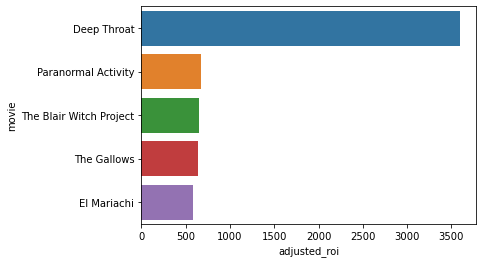

In [80]:
sns.barplot(x ='adjusted_roi', y ='movie', data = movie_budgets_df_top50_roi[:5])

## in breaking news - sex sells

however we should really get rid of that outlier - onlyfans changed the adult entertainment game

In [83]:
movie_budgets_df = movie_budgets_df[movie_budgets_df.movie != "Deep Throat"]

In [86]:
movie_budgets_df.head(1)

release_date                movie  year  adjusted_production_budget  \
id                                                                       
93   2009-09-25  Paranormal Activity  2009               551906.292107   

    adjusted_domestic_gross  adjusted_worldwide_gross  \
id                                                      
93             1.323579e+08              2.381574e+08   

    adjusted_budget_gross_diff  adjusted_roi  
id                                            
93                3.699634e+08    670.337431

<AxesSubplot:xlabel='adjusted_roi', ylabel='movie'>

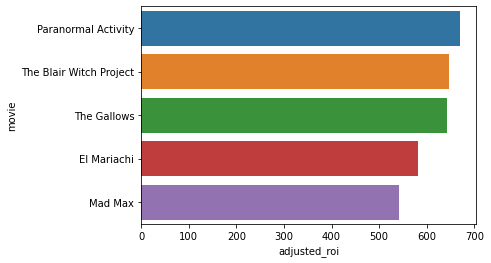

In [87]:
sns.barplot(x ='adjusted_roi', y ='movie', data = movie_budgets_df_top50_roi[:5])

# Let's bring in the genres!

In [156]:
title_basics_df = csv_files_dict['imdb_title_basics']
title_basics_df.head()

primary_title              original_title  \
tconst                                                                   
tt0063540                        Sunghursh                   Sunghursh   
tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
tt0069049       The Other Side of the Wind  The Other Side of the Wind   
tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
tt0100275         The Wandering Soap Opera       La Telenovela Errante   

           start_year  runtime_minutes                genres  
tconst                                                        
tt0063540        2013            175.0    Action,Crime,Drama  
tt0066787        2019            114.0       Biography,Drama  
tt0069049        2018            122.0                 Drama  
tt0069204        2018              NaN          Comedy,Drama  
tt0100275        2017             80.0  Comedy,Drama,Fantasy

In [157]:
title_basics_df.shape

(146022, 5)

In [158]:
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146022 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146022 non-null  object 
 1   original_title   146001 non-null  object 
 2   start_year       146022 non-null  int64  
 3   runtime_minutes  114342 non-null  float64
 4   genres           140627 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [159]:
title_basics_df.describe()

start_year  runtime_minutes
count  146022.000000    114342.000000
mean     2014.620461        86.192790
std         2.733120       166.404723
min      2010.000000         1.000000
25%      2012.000000        70.000000
50%      2015.000000        87.000000
75%      2017.000000        99.000000
max      2115.000000     51420.000000

In [160]:
title_basics_df.isna().sum()

primary_title          0
original_title        21
start_year             0
runtime_minutes    31680
genres              5395
dtype: int64

In [161]:
profile2 = ProfileReport(title_basics_df, title ='PPR2', html={'style':{'full_width':True}})

In [162]:
profile2

## Lets inspect the duplicates

In [163]:
title_basics_df.duplicated().sum()

0

In [164]:
title_basics_df.primary_title.duplicated().sum()

9951

In [165]:
title_basics_df.primary_title.duplicated()

tconst
tt0063540    False
tt0066787    False
tt0069049    False
tt0069204    False
tt0100275    False
             ...  
tt9916538    False
tt9916622    False
tt9916706    False
tt9916730    False
tt9916754    False
Name: primary_title, Length: 146022, dtype: bool

In [166]:
title_basics_df[title_basics_df.primary_title.duplicated()]

primary_title original_title  start_year  runtime_minutes  \
tconst                                                                  
tt10022974        Nemesis        Nemesis        2019              NaN   
tt10148772      Indemnity      Indemnity        2018             45.0   
tt10155932     Cinderella     Cinderella        2021              NaN   
tt10183816       Windfall       Windfall        2020              NaN   
tt10217566           Prey           Prey        2019             88.0   
...                   ...            ...         ...              ...   
tt9913594     Bacchanalia    Bacchanalia        2017             72.0   
tt9913936        Paradise       Paradise        2019              NaN   
tt9914642       Albatross      Albatross        2017              NaN   
tt9916160      Drømmeland     Drømmeland        2019             72.0   
tt9916170   The Rehearsal       O Ensaio        2019             51.0   

                            genres  
tconst                              
tt10022974         Action,Thriller  
tt10148772                Thriller  
tt10155932          Comedy,Fantasy  
tt10183816         Horror,Thriller  
tt10217566             Documentary  
...                            ...  
tt9913594   Drama,Mystery,Thriller  
tt9913936              Crime,Drama  
tt9914642              Documentary  
tt9916160              Documentary  
tt9916170                    Drama  

[9951 rows x 5 columns]

In [167]:
title_basics_df[title_basics_df.primary_title.duplicated()].head(50)

primary_title  \
tconst                                             
tt10022974                               Nemesis   
tt10148772                             Indemnity   
tt10155932                            Cinderella   
tt10183816                              Windfall   
tt10217566                                  Prey   
tt10261338                              Paradise   
tt10291640                                  Adam   
tt10294358                                Devour   
tt10298668                  Untitled Marvel Film   
tt10300396               Untitled Star Wars Film   
tt10300398               Untitled Star Wars Film   
tt10303892                          The Outsider   
tt10314516                          A Resistance   
tt10324140                    Between Two Worlds   
tt10325662                                 Magic   
tt10332854                                 Alone   
tt10344122                           The Courier   
tt10356428           Agent Sai Srinivasa Athreya   
tt10359746                       Diamond Anxiety   
tt10371174                           Rising Star   
tt10380766                              Immortal   
tt10411090                            Drain Baby   
tt10417444                              Antigone   
tt10435840                                Sunday   
tt10437138  Grateful Dead: Meet-Up at the Movies   
tt10443320     Pororo, Dinosaur Island Adventure   
tt10443708                        Monster Mayhem   
tt10443784                         Growing Pains   
tt10449440                          The Only Mom   
tt10449452                               Trouble   
tt10452830                       Midnight Melody   
tt10453130                 Can't See Me Love You   
tt10453366                     Daddy, Be with Me   
tt10462824                                  Jane   
tt10466204                                On Air   
tt1049406                                  Pablo   
tt1090749                                Consent   
tt1185393                                 Island   
tt1194577                               The Door   
tt1198133                                  Lapse   
tt1211340                           Broken Wings   
tt1226274                         Happy New Year   
tt1241330                              Road Kill   
tt1245534                               Snatched   
tt1262990                               Paradise   
tt1288411                           You Are Here   
tt1298554                                    Eva   
tt1303794                              Scrappers   
tt1316061                           Lost in Love   
tt1320103                                Morning   

                                  original_title  start_year  runtime_minutes  \
tconst                                                                          
tt10022974                               Nemesis        2019              NaN   
tt10148772                             Indemnity        2018             45.0   
tt10155932                            Cinderella        2021              NaN   
tt10183816                              Windfall        2020              NaN   
tt10217566                                  Prey        2019             88.0   
tt10261338                              Paradise        2019              NaN   
tt10291640                                  Adam        2019             20.0   
tt10294358                                Devour        2020             95.0   
tt10298668                  Untitled Marvel Film        2020              NaN   
tt10300396               Untitled Star Wars Film        2024              NaN   
tt10300398               Untitled Star Wars Film        2026              NaN   
tt10303892                          The Outsider        2019              NaN   
tt10314516                          A Resistance        2019              NaN   
tt10324140                    Between Two Worlds        2020              NaN   
tt10325662                        

### Thats not how to do it

In [168]:
title_basics_df.head()

primary_title              original_title  \
tconst                                                                   
tt0063540                        Sunghursh                   Sunghursh   
tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
tt0069049       The Other Side of the Wind  The Other Side of the Wind   
tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
tt0100275         The Wandering Soap Opera       La Telenovela Errante   

           start_year  runtime_minutes                genres  
tconst                                                        
tt0063540        2013            175.0    Action,Crime,Drama  
tt0066787        2019            114.0       Biography,Drama  
tt0069049        2018            122.0                 Drama  
tt0069204        2018              NaN          Comedy,Drama  
tt0100275        2017             80.0  Comedy,Drama,Fantasy

In [169]:
title_basics_df[title_basics_df.duplicated()]

Empty DataFrame
Columns: [primary_title, original_title, start_year, runtime_minutes, genres]
Index: []

In [170]:
title_basics_df.drop_duplicates(subset=None, keep='first', inplace=True)

In [171]:
title_basics_df.head()

primary_title              original_title  \
tconst                                                                   
tt0063540                        Sunghursh                   Sunghursh   
tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
tt0069049       The Other Side of the Wind  The Other Side of the Wind   
tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
tt0100275         The Wandering Soap Opera       La Telenovela Errante   

           start_year  runtime_minutes                genres  
tconst                                                        
tt0063540        2013            175.0    Action,Crime,Drama  
tt0066787        2019            114.0       Biography,Drama  
tt0069049        2018            122.0                 Drama  
tt0069204        2018              NaN          Comedy,Drama  
tt0100275        2017             80.0  Comedy,Drama,Fantasy

In [172]:
title_basics_df = title_basics_df.reset_index()

In [173]:
title_basics_df.head()

tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy

In [174]:
title_basics_df.drop(columns = ['tconst'], axis =1, inplace=True)
title_basics_df.head()

primary_title              original_title  start_year  \
0                        Sunghursh                   Sunghursh        2013   
1  One Day Before the Rainy Season             Ashad Ka Ek Din        2019   
2       The Other Side of the Wind  The Other Side of the Wind        2018   
3                  Sabse Bada Sukh             Sabse Bada Sukh        2018   
4         The Wandering Soap Opera       La Telenovela Errante        2017   

   runtime_minutes                genres  
0            175.0    Action,Crime,Drama  
1            114.0       Biography,Drama  
2            122.0                 Drama  
3              NaN          Comedy,Drama  
4             80.0  Comedy,Drama,Fantasy

In [175]:
title_basics_df.shape

(146022, 5)

# Lets join budget & genre dfs 

In [176]:
movie_budgets_df.head()

release_date                    movie  year  adjusted_production_budget  \
0   2009-09-25      Paranormal Activity  2009               551906.292107   
1   1999-07-14  The Blair Witch Project  1999               953366.526695   
2   2015-07-10              The Gallows  2015               110987.873658   
3   1993-02-26              El Mariachi  1993                12956.946191   
4   1980-03-21                  Mad Max  1980               661365.792759   

   adjusted_domestic_gross  adjusted_worldwide_gross  \
0             1.323579e+08              2.381574e+08   
1             2.233088e+08              3.945348e+08   
2             2.526573e+07              4.623363e+07   
3             3.777727e+06              3.779593e+06   
4             2.893475e+07              3.298562e+08   

   adjusted_budget_gross_diff  adjusted_roi  
0                3.699634e+08    670.337431  
1                6.168903e+08    647.065165  
2                7.138838e+07    643.208840  
3                7.544363e+06    582.264000  
4                3.581296e+08    541.500000

In [177]:
movie_budgets_df = movie_budgets_df.reset_index()

In [178]:
movie_budgets_df.drop(columns = ['id'], axis=1, inplace=True)
movie_budgets_df.head()

KeyError: "['id'] not found in axis"

In [139]:
movie_details_df = pd.merge(movie_budgets_df, title_basics_df, left_on=  ['movie'],
                   right_on= ['primary_title'], 
                   how = 'left')


In [179]:
movie_details_df.shape

(3211, 13)

In [181]:
movie_details_df.head(50)

release_date                            movie  year  \
2    2015-07-10                      The Gallows  2015   
6    1942-08-13                            Bambi  1942   
9    1968-10-01         Night of the Living Dead  1968   
10   1978-10-17                        Halloween  1978   
11   1976-11-21                            Rocky  1976   
12   1976-11-21                            Rocky  1976   
16   1937-12-21  Snow White and the Seven Dwarfs  1937   
17   1937-12-21  Snow White and the Seven Dwarfs  1937   
25   1981-05-01                   Graduation Day  1981   
26   1915-02-08            The Birth of a Nation  1915   
30   2012-01-06                 The Devil Inside  2012   
37   1974-11-15                            Benji  1974   
38   1974-11-15                            Benji  1974   
40   1950-02-15                       Cinderella  1950   
41   1950-02-15                       Cinderella  1950   
42   1950-02-15                       Cinderella  1950   
43   1950-02-15                       Cinderella  1950   
44   1950-02-15                       Cinderella  1950   
45   1950-02-15                       Cinderella  1950   
46   1950-02-15                       Cinderella  1950   
55   2011-04-01                        Insidious  2011   
56   2015-04-17                       Unfriended  2015   
62   2009-04-23                             Home  2009   
63   2009-04-23                             Home  2009   
64   2009-04-23                             Home  2009   
65   2009-04-23                             Home  2009   
66   2009-04-23                             Home  2009   
67   2009-04-23                             Home  2009   
68   2009-04-23                             Home  2009   
69   2009-04-23                             Home  2009   
70   2009-04-23                             Home  2009   
71   2009-04-23                             Home  2009   
72   2009-04-23                             Home  2009   
73   2009-04-23                             Home  2009   
74   2009-04-23                             Home  2009   
75   2009-04-23                             Home  2009   
76   2009-04-23                             Home  2009   
77   2009-04-23                             Home  2009   
78   2009-04-23                             Home  2009   
79   2009-04-23                             Home  2009   
80   2009-04-23                             Home  2009   
81   2009-04-23                             Home  2009   
82   2009-04-23                             Home  2009   
83   2009-04-23                             Home  2009   
84   2009-04-23                             Home  2009   
85   2009-04-23                             Home  2009   
89   2010-10-20            Paranormal Activity 2  2010   
90   2017-02-24                          Get Out  2017   
92   2017-01-20                            Split  2017   
93   2017-01-20                            Split  2017   

    adjusted_production_budget  adjusted_domestic_gross  \
2                 1.109879e+05             2.526573e+07   
6                 1.377360e+07             1.650216e+09   
9                 8.554101e+05             9.069647e+07   
10                1.282936e+06             1.855323e+08   
11                4.566845e+06             5.353947e+08   
12                4.566845e+06             5.353947e+08   
16                2.737062e+07             3.401563e+09   
17                2.737062e+07             3.401563e+09   
25                7.374081e+05             7.047852e+07   
26                2.913647e+06             2.648770e+08   
30                1.168584e+06             6.224220e+07   
37                2.571621e+06             1.623185e+08   
38                2.571621e+06             1.623185e+08   
40                3.268695e+07             9.580657e+08   
41                3.268695e+07             9.580657e+08   
42                3.268695e+07             9.580657e+08   
43                3.268695e+07           

In [154]:
movie_details_df.dropna(subset= ['genres'], inplace=True)

In [184]:
movie_details_df.movie.duplicated().sum()

1219

In [185]:
movie_details_df.shape

(3211, 13)

In [187]:
movie_details_df.drop_duplicates(subset='movie', keep='first', inplace=True)

In [206]:
movie_details_df.head()

release_date                     movie  year  adjusted_production_budget  \
2    2015-07-10               The Gallows  2015                1.109879e+05   
6    1942-08-13                     Bambi  1942                1.377360e+07   
9    1968-10-01  Night of the Living Dead  1968                8.554101e+05   
10   1978-10-17                 Halloween  1978                1.282936e+06   
11   1976-11-21                     Rocky  1976                4.566845e+06   

    adjusted_domestic_gross  adjusted_worldwide_gross  \
2              2.526573e+07              4.623363e+07   
6              1.650216e+09              4.302245e+09   
9              9.069647e+07              2.257612e+08   
10             1.855323e+08              2.763247e+08   
11             5.353947e+08              1.027540e+09   

    adjusted_budget_gross_diff  adjusted_roi             primary_title  \
2                 7.138838e+07    643.208840               The Gallows   
6                 5.938687e+09    431.164336                     Bambi   
9                 3.156023e+08    368.948491  Night of the Living Dead   
10                4.605741e+08    359.000000                 Halloween   
11                1.558368e+09    341.235147                     Rocky   

              original_title  ...  Musical  Action Mystery  Family  Western  \
2                The Gallows  ...      0.0     0.0     1.0     0.0      0.0   
6                      Bambi  ...      0.0     0.0     0.0     0.0      0.0   
9   Night of the Living Dead  ...      0.0     0.0     0.0     0.0      0.0   
10                 Halloween  ...      0.0     0.0     0.0     0.0      0.0   
11                     Rocky  ...      0.0     1.0     0.0     0.0      0.0   

    History  Comedy  News  Animation  Adventure  
2       0.0     0.0   0.0        0.0        0.0  
6       0.0     0.0   0.0        0.0        0.0  
9       0.0     0.0   0.0        0.0        0.0  
10      0.0     0.0   0.0        0.0        0.0  
11      0.0     1.0   0.0        0.0        0.0  

[5 rows x 35 columns]

In [191]:
movie_details_df.shape

(1992, 13)

### Now we will analyze the frequency of the genres 

In [193]:
type(movie_details_df.genres)

pandas.core.series.Series

In [194]:
movie_details_df.genres = movie_details_df.genres.apply(lambda x: x.split(',') if x else x)

In [204]:
movie_details_df.head()

release_date                     movie  year  adjusted_production_budget  \
2    2015-07-10               The Gallows  2015                1.109879e+05   
6    1942-08-13                     Bambi  1942                1.377360e+07   
9    1968-10-01  Night of the Living Dead  1968                8.554101e+05   
10   1978-10-17                 Halloween  1978                1.282936e+06   
11   1976-11-21                     Rocky  1976                4.566845e+06   

    adjusted_domestic_gross  adjusted_worldwide_gross  \
2              2.526573e+07              4.623363e+07   
6              1.650216e+09              4.302245e+09   
9              9.069647e+07              2.257612e+08   
10             1.855323e+08              2.763247e+08   
11             5.353947e+08              1.027540e+09   

    adjusted_budget_gross_diff  adjusted_roi             primary_title  \
2                 7.138838e+07    643.208840               The Gallows   
6                 5.938687e+09    431.164336                     Bambi   
9                 3.156023e+08    368.948491  Night of the Living Dead   
10                4.605741e+08    359.000000                 Halloween   
11                1.558368e+09    341.235147                     Rocky   

              original_title  ...  Musical  Action Mystery  Family  Western  \
2                The Gallows  ...      0.0     0.0     1.0     0.0      0.0   
6                      Bambi  ...      0.0     0.0     0.0     0.0      0.0   
9   Night of the Living Dead  ...      0.0     0.0     0.0     0.0      0.0   
10                 Halloween  ...      0.0     0.0     0.0     0.0      0.0   
11                     Rocky  ...      0.0     1.0     0.0     0.0      0.0   

    History  Comedy  News  Animation  Adventure  
2       0.0     0.0   0.0        0.0        0.0  
6       0.0     0.0   0.0        0.0        0.0  
9       0.0     0.0   0.0        0.0        0.0  
10      0.0     0.0   0.0        0.0        0.0  
11      0.0     1.0   0.0        0.0        0.0  

[5 rows x 35 columns]

In [197]:
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 2 to 6445
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   release_date                1992 non-null   datetime64[ns]
 1   movie                       1992 non-null   object        
 2   year                        1992 non-null   int64         
 3   adjusted_production_budget  1992 non-null   float64       
 4   adjusted_domestic_gross     1992 non-null   float64       
 5   adjusted_worldwide_gross    1992 non-null   float64       
 6   adjusted_budget_gross_diff  1992 non-null   float64       
 7   adjusted_roi                1992 non-null   float64       
 8   primary_title               1992 non-null   object        
 9   original_title              1992 non-null   object        
 10  start_year                  1992 non-null   float64       
 11  runtime_minutes             1857 non-null   float64     

In [198]:
all_genres = set()
for genres in movie_details_df['genres']:
    if genres:
        all_genres.update(genres)

In [199]:
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [201]:
#adding cols with zeros for all the genres we have. Will modify genre to 1 if the film is of that genre.

for genre in all_genres:
    movie_details_df[genre] = np.zeros(shape=movie_details_df.shape[0])
                                
movie_details_df.head()

release_date                     movie  year  adjusted_production_budget  \
2    2015-07-10               The Gallows  2015                1.109879e+05   
6    1942-08-13                     Bambi  1942                1.377360e+07   
9    1968-10-01  Night of the Living Dead  1968                8.554101e+05   
10   1978-10-17                 Halloween  1978                1.282936e+06   
11   1976-11-21                     Rocky  1976                4.566845e+06   

    adjusted_domestic_gross  adjusted_worldwide_gross  \
2              2.526573e+07              4.623363e+07   
6              1.650216e+09              4.302245e+09   
9              9.069647e+07              2.257612e+08   
10             1.855323e+08              2.763247e+08   
11             5.353947e+08              1.027540e+09   

    adjusted_budget_gross_diff  adjusted_roi             primary_title  \
2                 7.138838e+07    643.208840               The Gallows   
6                 5.938687e+09    431.164336                     Bambi   
9                 3.156023e+08    368.948491  Night of the Living Dead   
10                4.605741e+08    359.000000                 Halloween   
11                1.558368e+09    341.235147                     Rocky   

              original_title  ...  Musical  Action Mystery  Family  Western  \
2                The Gallows  ...      0.0     0.0     0.0     0.0      0.0   
6                      Bambi  ...      0.0     0.0     0.0     0.0      0.0   
9   Night of the Living Dead  ...      0.0     0.0     0.0     0.0      0.0   
10                 Halloween  ...      0.0     0.0     0.0     0.0      0.0   
11                     Rocky  ...      0.0     0.0     0.0     0.0      0.0   

    History  Comedy  News  Animation  Adventure  
2       0.0     0.0   0.0        0.0        0.0  
6       0.0     0.0   0.0        0.0        0.0  
9       0.0     0.0   0.0        0.0        0.0  
10      0.0     0.0   0.0        0.0        0.0  
11      0.0     0.0   0.0        0.0        0.0  

[5 rows x 35 columns]

In [202]:
for index, row in movie_details_df.iterrows():
    if row['genres']:
        for genre in row['genres']:
            movie_details_df.loc[index, genre] = 1

movie_details_df.head()

release_date                     movie  year  adjusted_production_budget  \
2    2015-07-10               The Gallows  2015                1.109879e+05   
6    1942-08-13                     Bambi  1942                1.377360e+07   
9    1968-10-01  Night of the Living Dead  1968                8.554101e+05   
10   1978-10-17                 Halloween  1978                1.282936e+06   
11   1976-11-21                     Rocky  1976                4.566845e+06   

    adjusted_domestic_gross  adjusted_worldwide_gross  \
2              2.526573e+07              4.623363e+07   
6              1.650216e+09              4.302245e+09   
9              9.069647e+07              2.257612e+08   
10             1.855323e+08              2.763247e+08   
11             5.353947e+08              1.027540e+09   

    adjusted_budget_gross_diff  adjusted_roi             primary_title  \
2                 7.138838e+07    643.208840               The Gallows   
6                 5.938687e+09    431.164336                     Bambi   
9                 3.156023e+08    368.948491  Night of the Living Dead   
10                4.605741e+08    359.000000                 Halloween   
11                1.558368e+09    341.235147                     Rocky   

              original_title  ...  Musical  Action Mystery  Family  Western  \
2                The Gallows  ...      0.0     0.0     1.0     0.0      0.0   
6                      Bambi  ...      0.0     0.0     0.0     0.0      0.0   
9   Night of the Living Dead  ...      0.0     0.0     0.0     0.0      0.0   
10                 Halloween  ...      0.0     0.0     0.0     0.0      0.0   
11                     Rocky  ...      0.0     1.0     0.0     0.0      0.0   

    History  Comedy  News  Animation  Adventure  
2       0.0     0.0   0.0        0.0        0.0  
6       0.0     0.0   0.0        0.0        0.0  
9       0.0     0.0   0.0        0.0        0.0  
10      0.0     0.0   0.0        0.0        0.0  
11      0.0     1.0   0.0        0.0        0.0  

[5 rows x 35 columns]

In [213]:
top_100_roi_genre_df = movie_details_df[:100]

In [214]:
#making a list of all genres

cols = list(top_100_roi_genre_df.columns)

In [215]:
genre_cols = cols[13:]

In [216]:
#getting a dict with genre counts

genre_count = {}
for col in genre_cols:
    count = np.sum(top_100_roi_genre_df[col] == 1).sum() 
    genre_count[col] = count

In [217]:
genre_count

{'Crime': 4,
 'Documentary': 7,
 'Drama': 45,
 'Music': 3,
 'Biography': 10,
 'Horror': 37,
 'Thriller': 26,
 'Sci-Fi': 2,
 'Romance': 9,
 'Fantasy': 5,
 'Sport': 2,
 'War': 1,
 'Musical': 2,
 'Action': 11,
 'Mystery': 18,
 'Family': 7,
 'Western': 0,
 'History': 1,
 'Comedy': 23,
 'News': 0,
 'Animation': 3,
 'Adventure': 7}

In [218]:
type(genre_count)

dict

In [221]:
# Sort Dictionary by value in descending order using lambda function
genre_count_ascending = dict( sorted(genre_count.items(),
                           key=lambda item: item[1], reverse = True))
print(genre_count_ascending)

{'Drama': 45, 'Horror': 37, 'Thriller': 26, 'Comedy': 23, 'Mystery': 18, 'Action': 11, 'Biography': 10, 'Romance': 9, 'Documentary': 7, 'Family': 7, 'Adventure': 7, 'Fantasy': 5, 'Crime': 4, 'Music': 3, 'Animation': 3, 'Sci-Fi': 2, 'Sport': 2, 'Musical': 2, 'War': 1, 'History': 1, 'Western': 0, 'News': 0}


In [222]:
keys = list(genre_count_ascending.keys())
values = list(genre_count_ascending.values())

<AxesSubplot:>

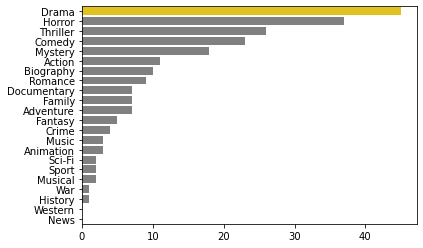

In [223]:
clrs = ['grey' if (x < max(values)) else "gold" for x in values ]
sns.barplot(y = keys, x = values, palette=clrs)